In [37]:
# importing stuff for drawing plots
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df1 = pd.read_csv('survey.csv', sep=';')
df2 = pd.read_csv('steps.csv', sep=';')
df1.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [39]:
# add the average steps per day per id, I do this for the plot later.
df2['average'] = df2.loc[:, "20-6-2013":"13-5-2014"].mean(axis=1)
df2.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,average
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [40]:
# merge the two databases on 'id'
df = pd.merge(df1, df2, on = 'id')
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,average
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


In [41]:
# The relation of meansteps per participant with at least 2 other quantitative variables 
# (e.g., how are steps related to weight, height).

# Correlation matrix including all 3 variables
# I choose variables average, weight and height  
# Firstly, I clean up the outliers
## remove +40000 steps, that is around 30 km (for the daily marathon runners and pilgrims :) )
def above_40000(x):
    if(x > 40000.0): 
        return float('NaN')
    else: 
        return x
df['average'] = df['average'].apply(above_40000)

# let's clean up the weight as well.

def above_200(x):
    if(x > 200.0): 
        return float('NaN')
    else: 
        return x
    
def below_40(x):
    if(x < 40.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(below_40)
df['weight'] = df['weight'].apply(above_200)

df["average"] = df["average"].dropna()
df["weight"] = df["weight"].dropna()
df["height"] = df["height"].dropna()
# now i make a new df

df1 = df[["average", "height", "weight"]]

In [42]:
df1.head()

,average,height,weight
0,10205.521212,178.0,98.0
1,5687.423313,180.0,77.0
2,8301.729730,180.0,83.0
3,3633.200000,178.0,80.0
4,5312.129630,167.0,61.0


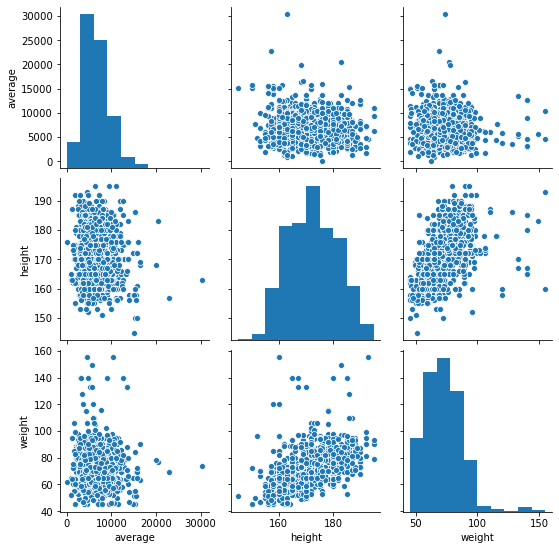

In [43]:
# now I make a correlation matrix

sns.pairplot(df1)
plt.show() 

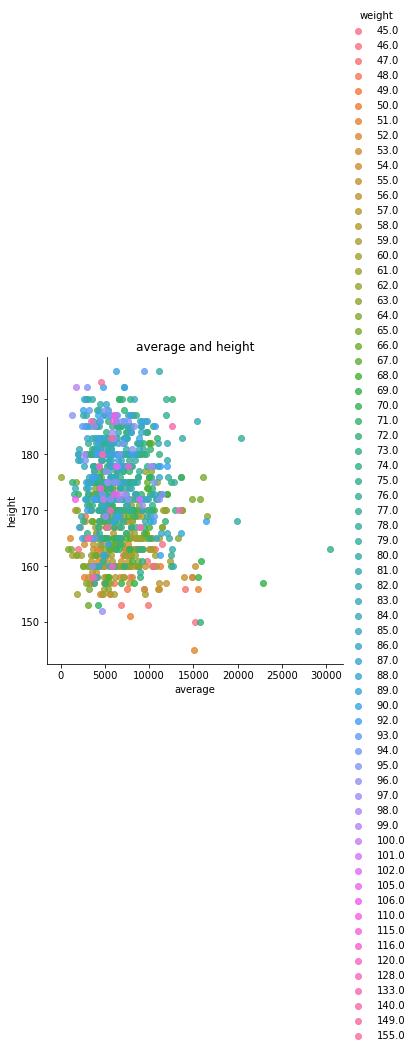

In [44]:
# not really any clear relations yet....
#Scatter plots of your variable with the 2 other variables (2 scatter plots in total)
sns.lmplot(x='average', y='height', fit_reg=False, data=df1, hue = "weight") #fit_reg=False leaves out the regression line; see below
plt.xlabel('average') #use matplotlib to refine Seaborn plot
plt.ylabel('height')
plt.title('average and height')
plt.show()

# add a nice color :)

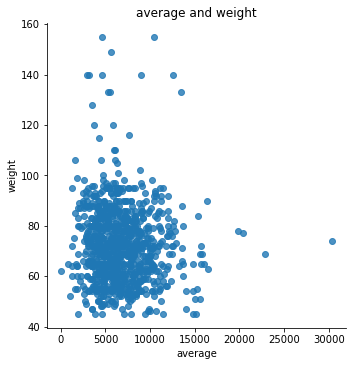

In [45]:
# and now the second plot:

sns.lmplot(x='average', y='weight', fit_reg=False, data=df1) #fit_reg=False leaves out the regression line; see below
plt.xlabel('average') #use matplotlib to refine Seaborn plot
plt.ylabel('weight')
plt.title('average and weight')
plt.show()

# i leave the color out this time because the legenda is a bit too big

In [46]:
# Pearson’s correlation for the 2 relations

from scipy.stats.stats import pearsonr 
# print(pearsonr(df['average'], df['weight']))

# It gives an error to remove NaN-values, but I already did that...




### Verbal description of the relations, including strength of the association, linearity, etc.

Not so linear. So there is not really a relation between steps and height/weight. 

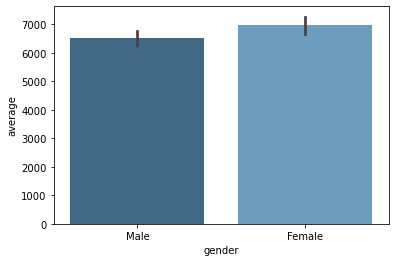

In [47]:
# The relation of mean steps per participant with a qualitative variable with two levels 
#(e.g. gender, weekday vs weekend)
sns.barplot(x="gender", y="average", data=df, palette="Blues_d")
plt.show()

## Verbal description of the relation
on average, females have more steps then males.

In [49]:
# Cross table with relevant percentages
corr = df[['average', 'education_1', 'city']].corr() 
corr

,average
average,1.0


## Verbal description of the relation

It is not working ☹️

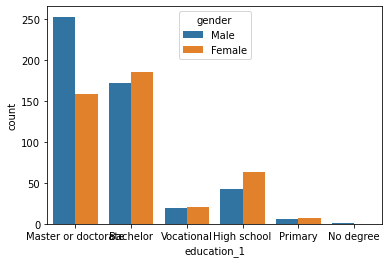

In [52]:
#Two qualitative variables: gender and education
sns.countplot(x="education_1", hue="gender", data=df)
plt.show()

In [53]:
# crosstab
pd.crosstab(df["education_1"], df["gender"], normalize="columns")*100

gender,Female,Male
education_1,,
Bachelor,42.528736,34.817814
High school,14.482759,8.704453
Master or doctorate,36.551724,51.214575
No degree,0.000000,0.202429
Primary,1.609195,1.214575
Vocational,4.827586,3.846154


## Verbal description

42 percent of females have a bachelor, 36 have a master.
of the males, 51 have a master and 34 a bachelor. 
